In [29]:
#Recurrent Neural Networks (RRN) | LSTM For Trading Algorithms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'BTC-USD', start='2014-09-23', end = '2024-03-01')
data.head(10)

C:\Users\JulioIsaacMR\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800
2014-09-27,403.556000,406.622986,397.372009,399.519989,399.519989,15029300
2014-09-28,399.471008,401.016998,374.332001,377.181000,377.181000,23613300
2014-09-29,376.928009,385.210999,372.239990,375.467010,375.467010,32497700
2014-09-30,376.088013,390.976990,373.442993,386.944000,386.944000,34707300
2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400


In [30]:
# Adding indicators
data['RSI']=ta.momentum.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
fechas = data['Date']
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
print(fechas)

0      2015-02-19
1      2015-02-20
2      2015-02-21
3      2015-02-22
4      2015-02-23
          ...    
3292   2024-02-24
3293   2024-02-25
3294   2024-02-26
3295   2024-02-27
3296   2024-02-28
Name: Date, Length: 3297, dtype: datetime64[ns]


C:\Users\JulioIsaacMR\AppData\Local\Temp\ipykernel_17476\3840171679.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [32]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,236.410004,242.671997,235.591995,240.283005,51.259855,234.365059,283.147296,320.997846,3.528000,1,243.779007
1,240.251007,247.100998,239.298996,243.779007,52.603132,235.261625,282.367726,319.975080,0.781998,1,244.533997
2,243.751999,255.320007,243.184006,244.533997,52.903463,236.144708,281.618543,318.975861,-8.567001,0,235.977005
3,244.544006,246.391998,233.850998,235.977005,49.123534,236.128737,280.714750,317.876538,2.897003,1,238.891998
4,235.994995,240.108994,232.421005,238.891998,50.416585,236.391904,279.886577,316.830385,-0.263000,0,238.735001
5,238.998001,239.901001,236.401993,238.735001,50.342752,236.615056,279.071694,315.796009,-1.419998,0,237.470001
6,238.889999,239.339996,235.529999,237.470001,49.714227,236.696480,278.247899,314.758579,-0.911011,0,236.425995
7,237.337006,237.710007,234.257004,236.425995,49.171385,236.670719,277.419742,313.721061,17.391998,1,253.828003
8,236.436005,256.653015,236.436005,253.828003,57.465879,238.304746,276.952579,312.927776,0.742996,1,254.263000
9,253.520004,254.692001,249.479004,254.263000,57.650966,239.824580,276.503280,312.150759,5.918991,1,260.201996


In [33]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[3.91181185e-04 2.74758068e-04 5.44328128e-04 ... 5.08787879e-01
  1.00000000e+00 4.94148216e-04]
 [4.48220425e-04 3.39352973e-04 6.00339929e-04 ... 5.08603257e-01
  1.00000000e+00 5.05357104e-04]
 [5.00210464e-04 4.59223380e-04 6.59041399e-04 ... 5.07974695e-01
  0.00000000e+00 3.78316466e-04]
 ...
 [7.65083551e-01 7.97983093e-01 7.66539005e-01 ... 6.81071264e-01
  1.00000000e+00 8.44387951e-01]
 [8.06497837e-01 8.35897977e-01 8.20226433e-01 ... 8.73874437e-01
  1.00000000e+00 9.24846873e-01]
 [8.44391318e-01 9.28878643e-01 8.54287200e-01 ... 4.21093851e-01
  0.00000000e+00 9.05451425e-01]]


In [34]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X)
print(X.shape)
#print(y)
print(y.shape)

3297
(3267, 30, 8)
(3267, 1)


In [35]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2613
(2613, 30, 8)
(654, 30, 8)
(2613, 1)
(654, 1)
[[0.00085315]
 [0.00083504]
 [0.00052111]
 ...
 [0.44377075]
 [0.46164357]
 [0.44023214]]


In [36]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
157/157 [==============================] - 3s 12ms/step - loss: 8.2461e-04 - val_loss: 0.0025
Epoch 2/30
157/157 [==============================] - 1s 10ms/step - loss: 4.7170e-04 - val_loss: 0.0022
Epoch 3/30
157/157 [==============================] - 1s 9ms/step - loss: 4.0346e-04 - val_loss: 0.0013
Epoch 4/30
157/157 [==============================] - 2s 10ms/step - loss: 3.6757e-04 - val_loss: 0.0013
Epoch 5/30
157/157 [==============================] - 2s 10ms/step - loss: 2.9966e-04 - val_loss: 0.0015
Epoch 6/30
157/157 [==============================] - 2s 12ms/step - loss: 3.3661e-04 - val_loss: 0.0012
Epoch 7/30
157/157 [==============================] - 2s 10ms/step - loss: 2.9503e-04 - val_loss: 0.0016
Epoch 8/30
157/157 [==============================] - 1s 9ms/step - loss: 3.0968e-04 - val_loss: 0.0034
Epoch 9/30
157/157 [==============================] - 1s 9ms/step - loss: 2.4740e-04 - val_loss: 0.0012
Epoch 10/30
157/157 [==============================] - 1s 

In [37]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

21/21 [==============================] - 0s 5ms/step
[0.47032502] [0.44858978]
[0.45417905] [0.42326794]
[0.45842707] [0.44693405]
[0.43987396] [0.43040118]
[0.45550132] [0.43383792]
[0.44431114] [0.44707344]
[0.44261613] [0.42888937]
[0.45501077] [0.43715401]
[0.4418023] [0.43576996]
[0.44417045] [0.43138823]


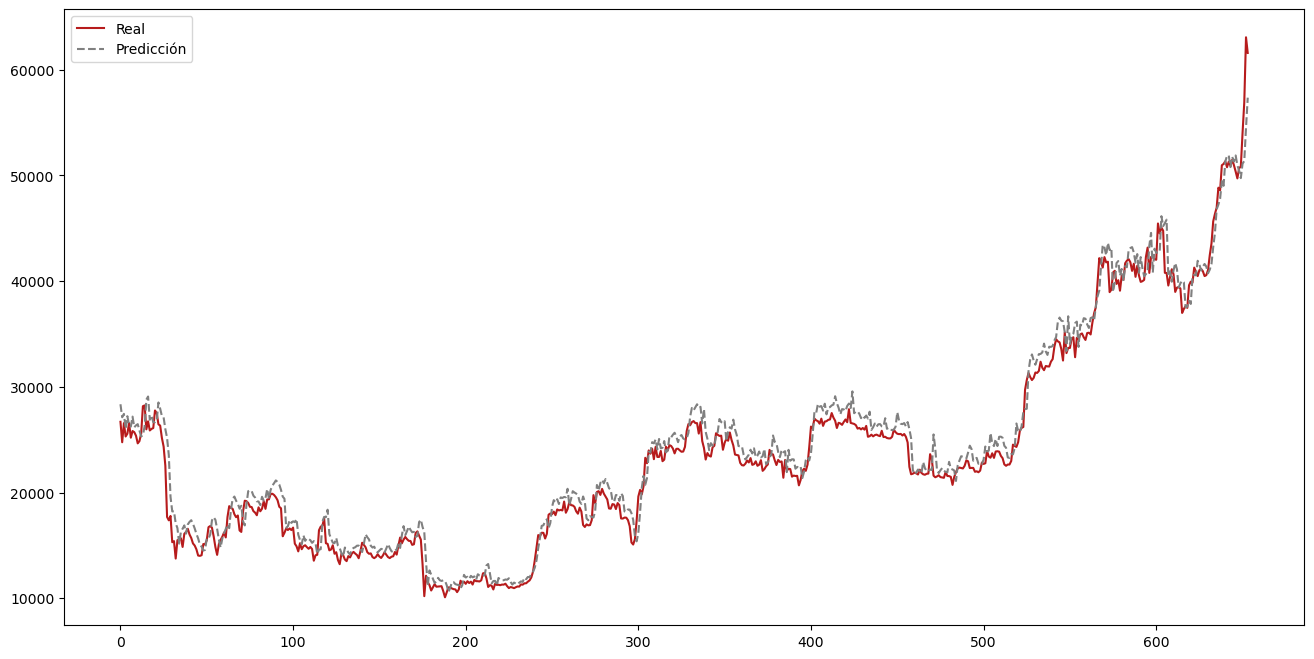

In [38]:
plt.figure(figsize=(16,8))
plt.plot(y_test * (np.max(data_set) - np.min(data_set)) + np.min(data_set),color = '#B71B1C', label = 'Real')
plt.plot(y_pred * (np.max(data_set) - np.min(data_set)) + np.min(data_set),linestyle = 'dashed',color = 'gray', label = 'Predicción')
plt.legend()
plt.show()